![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


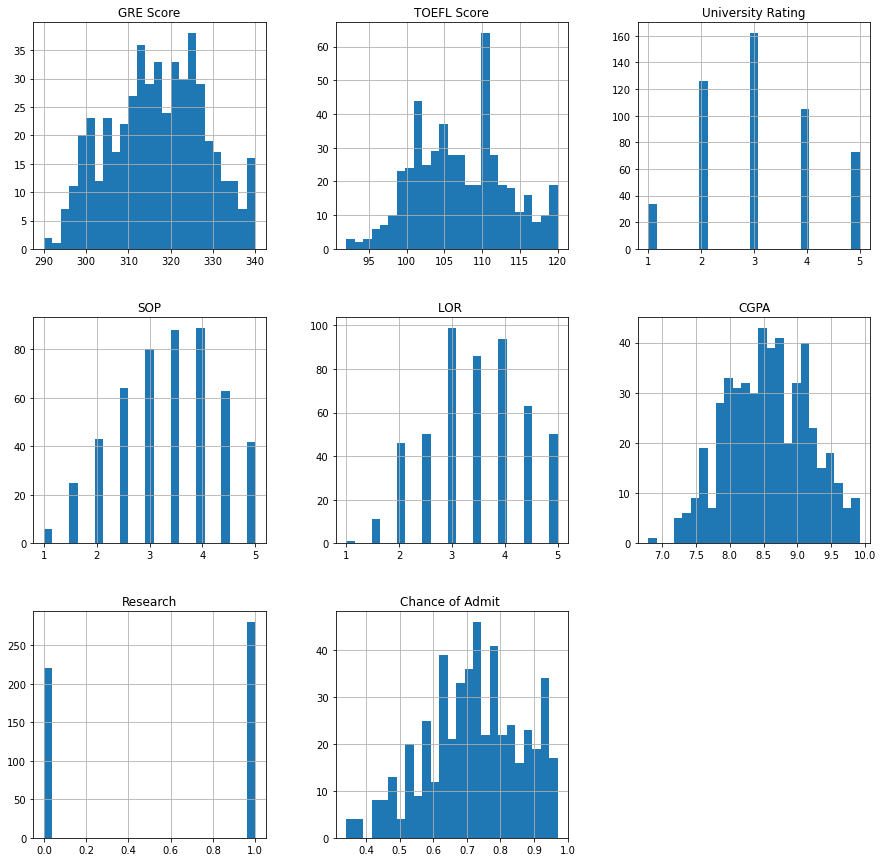

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, variables de interés
output_var = 1
print(output_var, ' output variables')

1  output variables


In [9]:
# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


In [10]:
xTrain.shape

(350, 7)

### Red Neuronal de una sola Capa

In [11]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

A continuación de define el modelo de capas secuenciales. 

Dado que el objetivo es predecir probabilidades de admisión, las que deben estar en el rango 0-1, la función de activación a utilizar es sigmoide.

In [12]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape y activacion sigmoide
model.add(Dense(output_var, input_shape=(dims,), activation = 'sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics='mean_absolute_error')

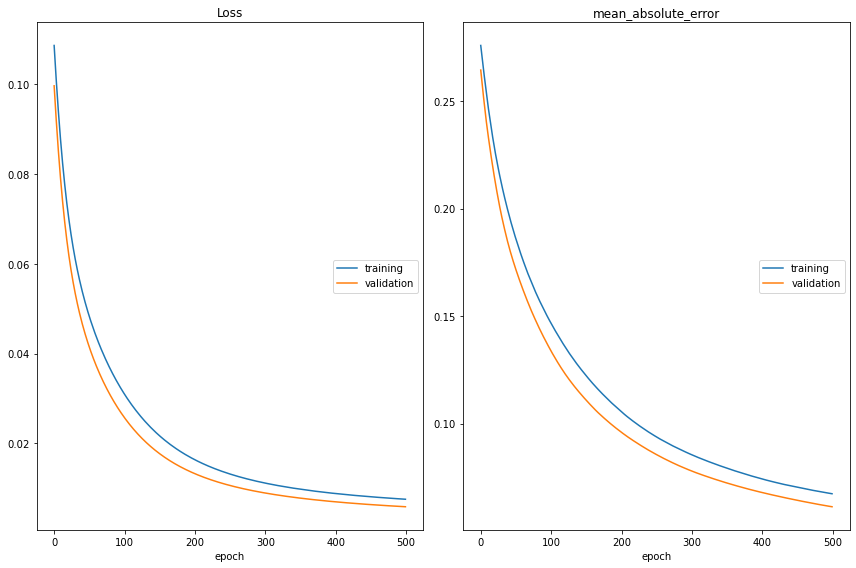

Loss
	training         	 (min:    0.008, max:    0.109, cur:    0.008)
	validation       	 (min:    0.006, max:    0.100, cur:    0.006)
mean_absolute_error
	training         	 (min:    0.067, max:    0.276, cur:    0.067)
	validation       	 (min:    0.061, max:    0.264, cur:    0.061)


In [14]:
# Entrenamiento de la red neuronal con 50 épocas

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=500,
          batch_size=50,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

Al ejecutar el modelo por 500 la función de perdidas pareciera seguir disminuyendo pero va alcanzando un nivel estable.

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

prediction = model.predict(xTest)

MSE = mean_squared_error(yTest, prediction)
RMSE = MSE**(1/2)
MAE = mean_absolute_error(yTest, prediction)


print("MSE: {} , RMSE: {}, MAE: {}".format(MSE, RMSE, MAE))

MSE: 0.005888114161635278 , RMSE: 0.07673404825522552, MAE: 0.06139142339229583


Al evaluar las métricas se debe tener en cuenta la particularidad de que la variable de respuesta se encuentra entre 0-1, y por lo tanto las distancias entre las predicciones y los valores reales tambien se encontrarán en este rango, por lo que al elevarlas al cuadrado el valor del error sera menor. A pesar de esto, se mantiene la propiedad de que los costos de los errores crece aceleradamente en la medida que el error sea mayor. Por otro lado, con el MAE, el costo que se genera por un error es lineal (porporcional a la distancia). Esto quiere decir que ante la presencia de outliers el MSE dara un mayor costo a ese error de lo que daría el MAE.

Para hacer el MSE un poco más comparable con el MAE se estima el RMSE para tener lás métricas en las mismas 'unidades'. Se obtiene un MAE de 0.061 y un RMSE de 0.077.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [16]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Se definen la red neuronal con las dos capas ocultas y la capa de salida.
model2.add(Dense(8, input_shape=(dims,),activation='sigmoid'))
model2.add(Dense(8,activation='sigmoid'))
model2.add(Dense(output_var))
model2.add(Activation('sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics='mean_absolute_error')

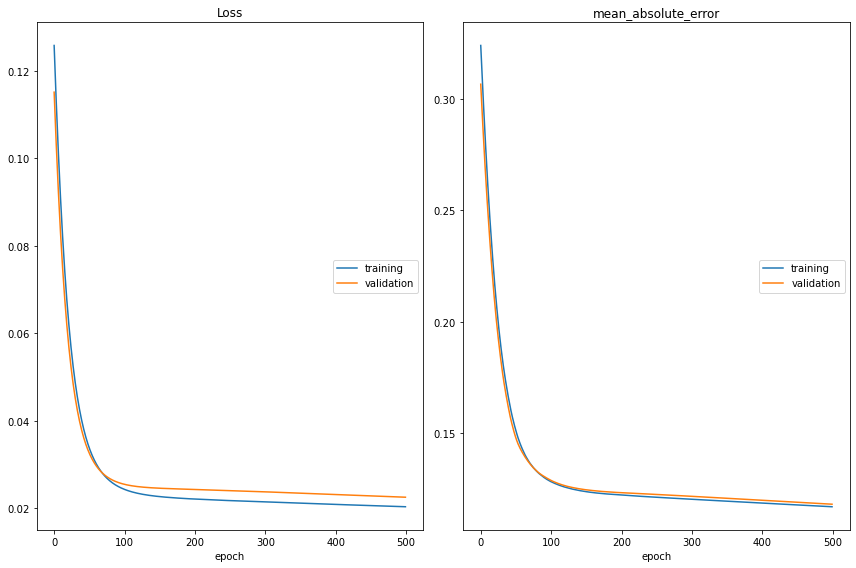

Loss
	training         	 (min:    0.020, max:    0.126, cur:    0.020)
	validation       	 (min:    0.023, max:    0.115, cur:    0.023)
mean_absolute_error
	training         	 (min:    0.117, max:    0.324, cur:    0.117)
	validation       	 (min:    0.118, max:    0.307, cur:    0.118)


In [18]:
# Entrenamiento de la red neuronal
model2.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=500,
          batch_size= 50,
          callbacks=[PlotLossesKeras()])

In [19]:
prediction2 = model2.predict(xTest)
prediction2


MSE_2 = mean_squared_error(yTest, prediction2)
RMSE_2 = MSE_2 ** (1/2)
MAE_2 = mean_absolute_error(yTest, prediction2)



print("MSE: {} , RMSE: {}, MAE: {}".format(MSE_2, RMSE_2, MAE_2))

MSE: 0.02251906538029795 , RMSE: 0.15006353781081516, MAE: 0.11800377014478049


Al correro el modelo por 500 épocas vemos que la función de pérdidas sigue decreciendo levemento. Sin embargo, pareciera que el error de validación a partir de la epoca 50 empieza a incrementar un poco más rapido que el error de entrenamiento lo que podría dar indicios de sobreajuste.

En este caso las métricas de error obtenidos son mayores a los de la red nueronal de una capa. El RMSE da 0.15 y el MAE: 0.118

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [20]:
# Importación librerías

from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [21]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Se define una capa de dropout entre las capas ocultas. La capa de dropout se incluyó con parámetro de 0.2 (Es decir se apagan el 20% de los inputs para la siguiente capa)
model3.add(Dense(8, input_shape=(dims,)))
model3.add(Dropout(0.2))
model3.add(Dense(8,activation='sigmoid'))
model3.add(Dense(output_var))
model3.add(Activation('sigmoid'))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model3.compile(optimizer='sgd' , loss='mean_squared_error', metrics = 'mean_absolute_error')

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento. Se define un delta mínimo y paciencia.

early_stop = EarlyStopping(monitor='val_loss', min_delta = 0.00001, patience=3, verbose=1) 

In [23]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

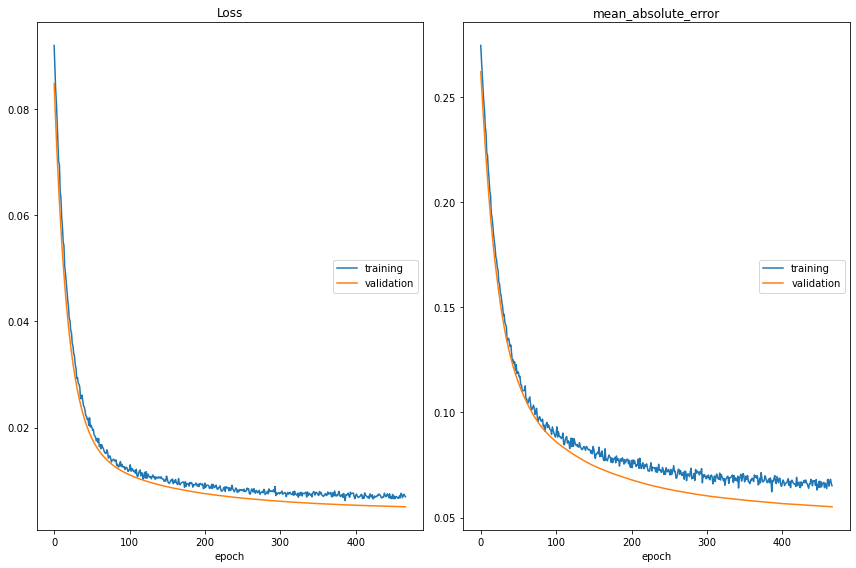

Loss
	training         	 (min:    0.006, max:    0.092, cur:    0.007)
	validation       	 (min:    0.005, max:    0.085, cur:    0.005)
mean_absolute_error
	training         	 (min:    0.062, max:    0.275, cur:    0.065)
	validation       	 (min:    0.055, max:    0.262, cur:    0.055)
Epoch 00467: early stopping


In [24]:
# Entrenamiento de la red neuronal con early stopping (Se permiten hasta 10.000 epocas pero se espera que el modelo finalice antes con los parámetros del earlystopping)
model3.fit(
          xTrain , yTrain, 
          verbose = True, 
          epochs = 10000, 
          batch_size = 50,
          validation_data = (xTest,yTest),
          callbacks= [ best_model , early_stop , PlotLossesKeras() ] 
         )

Se obtuvieron 460 épocas para llegar al Early Stopping, ya que no hubo mejoras superiores al min_delta. 

A continuación se cargan los pesos estimados del mejor modelo obtenido y se calculan los errores.

In [28]:
model3.load_weights(fBestModel)

prediction3 = model3.predict(xTest)
MSE_3 = mean_squared_error(yTest, prediction3)
RMSE_3 = MSE_3**(1/2)
MAE_3 = mean_absolute_error(yTest, prediction3)
print("MSE {} ,RMSE {}, MAE {}".format(MSE_3, RMSE_3, MAE_3))

MSE 0.005092180292522919 ,RMSE 0.07135951437981426, MAE 0.05514024504025777


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

El modelo con el mejor desempeño es el modelo de red neuronal de multicapas con early stopping y capa de dropout. La ventaja de este modelo consiste en que los dos mecanismos incluidos (early stopping y dropout) limitan la propensión a que se genere un sobreajuste al modelo. El modelo con peor desempeño es el modelo multicapa ya que en este se evidenció un posible sobreajuste. 

El modelo con una sola capa tambien presenta un buen desempeño, mejor que el del modelo del punto 2. En parte se puede deber a que al tener menos capas y parametros a estimar se tarda más en llegar a hacer sobreajuste. Adicionalmente, este modelo puede ser más sencillo y rápido de estimar.

[0.005888114161635278, 0.02251906538029795, 0.005092180292522919]


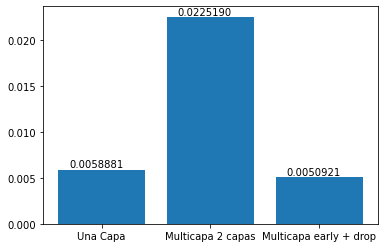

In [26]:
# Celda 4


MSEPlot = [MSE , MSE_2, MSE_3]
print(MSEPlot)

XLabels = ['Una Capa' , 'Multicapa 2 capas', 'Multicapa early + drop']
xpos = np.arange(len(XLabels))


plt.bar(XLabels, MSEPlot)

for i, v in enumerate(MSEPlot):
    plt.text(xpos[i]-0.3,v, str(v)[0:9], verticalalignment="bottom")

plt.show()


[0.06139142339229583, 0.11800377014478049, 0.05514024504025777]


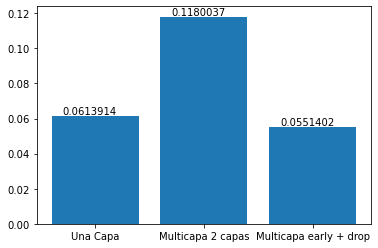

In [27]:
MAEPlot = [MAE , MAE_2, MAE_3]
print(MAEPlot)

XLabels = ['Una Capa' , 'Multicapa 2 capas', 'Multicapa early + drop']
xpos = np.arange(len(XLabels))


plt.bar(XLabels, MAEPlot)

for i, v in enumerate(MAEPlot):
    plt.text(xpos[i]-0.3,v, str(v)[0:9], verticalalignment="bottom")

plt.show()